In [50]:
%pylab inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

from datetime import date
import datetime
import time

from moudle.pre_process import *
from moudle.segment import *

import seaborn as sns
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


0
互联网金融
1
会计财务
2
保险公司
3
信托与融资租赁
4
其他
5
商业银行
6
基金与期货
7
官方机构
8
投行与券商
9
私募股权与风投
10
职能岗位
11
财富管理


(array([ 1851.,    31.,   148.,    92.,  1235.,   105.,   171.,     6.,
         1574.,  3058.,    67.,  1564.]),
 array([  0.        ,   0.91666667,   1.83333333,   2.75      ,
          3.66666667,   4.58333333,   5.5       ,   6.41666667,
          7.33333333,   8.25      ,   9.16666667,  10.08333333,  11.        ]),
 <a list of 12 Patch objects>)

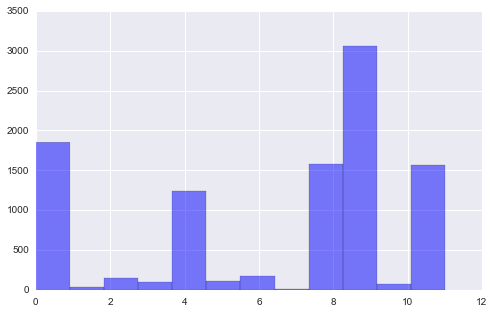

In [51]:

src_data=open("data/applications.json")
corpus=src_data.read().replace('}{', '}|{').split('|')

cate_list=[]
cate_num=-1
for item in corpus[:cate_num]:   
    vec=apply_vec(item)
    if vec:
        if vec[1]:
            cate_list.append(vec[1][2])
            

cate_pd=pd.DataFrame(cate_list)

cates = list(enumerate(np.unique(cate_pd[0])))    
cate_dict = { name : i for i, name in cates }             
cate_pd[0] = cate_pd[0].map( lambda x: cate_dict[x]).astype(int) 


inverted_cate=dict([(v,k) for k,v in cate_dict.items()]) 
for idx,cate in inverted_cate.items():
    print idx
    print cate
   
plt.hist(cate_pd[0],bins=len(cate_dict),facecolor='blue', alpha=0.5)

0
IT技术
1
互联网金融
2
会计财务
3
保险公司
4
信托与融资租凭
5
信托与融资租赁
6
其他
7
内资投行/券商
8
商业银行
9
基金与期货
10
官方机构
11
投行与券商
12
私募股权与风投
13
职能岗位
14
财富管理


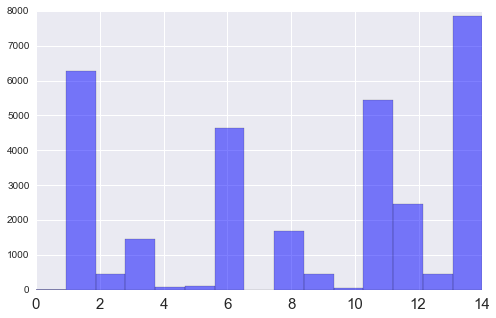

In [52]:
cate_list=[]


src_data=open("data/position.txt")
corpus=src_data.read().split('\n')
position_num=1
for item in corpus[:-position_num]:
    position=position_vec_all(item)
    if position:
        cate_list.append(position[2])


cate_pd=pd.DataFrame(cate_list)

cates = list(enumerate(np.unique(cate_pd[0])))    
cate_dict = { name : i for i, name in cates }             
cate_pd[0] = cate_pd[0].map( lambda x: cate_dict[x]).astype(int) 


inverted_cate=dict([(v,k) for k,v in cate_dict.items()]) 
for idx,cate in inverted_cate.items():
    print idx
    print cate
   
plt.hist(cate_pd[0] ,bins=len(cate_dict) ,facecolor='blue', alpha=0.5)
axis = plt.gca().xaxis

for tick in axis.get_major_ticks():
    tick.label1.set_fontsize(15)